In [85]:
#%load_ext lab_black

In [107]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as pyo
import plotly.express as px

from IPython.display import display
from IPython.display import Markdown as md

pd.options.display.float_format = "{:.2f}".format

In [108]:
# Replace this if needed
pio.templates.default = "plotly_dark"

In [109]:
df_raw = pd.read_excel("Data/tableaux-4001-ts.xlsx", sheet_name = 0)

In [133]:
df = df_raw.transpose()
columns = pd.MultiIndex.from_arrays([df.loc['catégorie'], df.loc['libellé index']])
df.columns = columns
df = df.drop(index = ['Index','libellé index', 'catégorie'], columns = [(np.NaN,'Index non utilisé')])
df.index = pd.to_datetime(df.index, format = "%Y_%m")

tot_cols = []
for cat in df.columns.get_level_values(0).unique():
    new_col = 'total_' + cat
    tot_cols.append(new_col)
    df[new_col] = df.loc[:,cat].sum(axis = 1)
display(df)

catégorie           Violences physiques crapuleuses   \
libellé index Règlements de compte entre malfaiteurs   
2020-08-01                                         7   
2020-07-01                                        18   
2020-06-01                                         7   
2020-05-01                                         3   
2020-04-01                                         5   
...                                              ...   
2000-05-01                                         5   
2000-04-01                                         2   
2000-03-01                                         9   
2000-02-01                                         5   
2000-01-01                                        11   

catégorie                                                   \
libellé index Homicides pour voler et à l'occasion de vols   
2020-08-01                                               1   
2020-07-01                                               2   
2020-06-01                                              12   
2020-05-01                                               4   
2020-04-01                                               2   
...                                                    ...   
2000-05-01                                               4   
2000-04-01                                               7   
2000-03-01                                               6   
2000-02-01                                               5   
2000-01-01                                               2   

catégorie     Violences physiques non crapuleuses   \
libellé index       Homicides pour d'autres motifs   
2020-08-01                                      73   
2020-07-01                                      80   
2020-06-01                                      74   
2020-05-01                                      55   
2020-04-01                                      57   
...                                            ...   
2000-05-01                                      77   
2000-04-01                                      76   
2000-03-01                                      70   
2000-02-01                                      96   
2000-01-01                                      60   

catégorie                              Violences physiques crapuleuses   \
libellé index Tentatives d'homicides pour voler et à l'occasion de vols   
2020-08-01                                                    16          
2020-07-01                                                    10          
2020-06-01                                                     7          
2020-05-01                                                     5          
2020-04-01                                                     4          
...                                                          ...          
2000-05-01                                                    14          
2000-04-01                                                     5          
2000-03-01                                                     9          
2000-02-01                                                    10          
2000-01-01                                                     7          

catégorie          Violences physiques non crapuleuses   \
libellé index Tentatives homicides pour d'autres motifs   
2020-08-01                                          267   
2020-07-01                                          369   
2020-06-01                                          304   
2020-05-01                                          264   
2020-04-01                                          197   
...                                                 ...   
2000-05-01                                          106   
2000-04-01                                           63   
2000-03-01                                          104   
2000-02-01                                           91   
2000-01-01                                           65   

catégorie        

In [151]:
df_gr = df[tot_cols]
df_gr.columns = df_gr.columns.droplevel(level="libellé index")

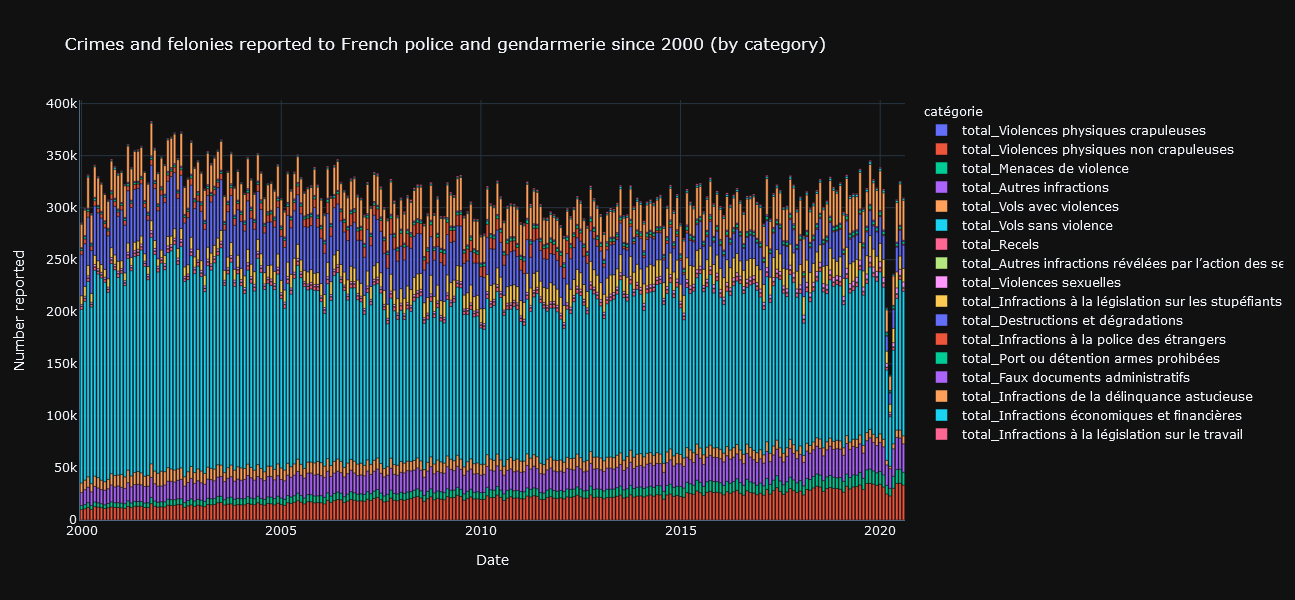

In [159]:
fig = px.bar(
    df_gr,
    title="Crimes and felonies reported to French police and gendarmerie since 2000 (by category)",
    height = 600
)

fig.update_layout(yaxis={"title": "Number reported"}, xaxis={"title": "Date"})

fig.show()